# 5. Bar charts

Bar charts are very common, but that is no reason to avoid them. If anything, readers immediately know how to interpret the graph.

In this notebook, we will go through a simple example involving the 100% bar chart visualization. Although this visualization can be created easily with matplotlib, Multiplex includes helper functions so you can create these visualizations faster.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

The first example uses data from [the International Energy Agency](https://www.iea.org/data-and-statistics?fuel=Energy%20supply&indicator=Electricity%20generation%20by%20source) to show how different countries generate electricity. Although a normal bar chart would do, a 100% bar chart makes it clearer how the energy trends are different from one region to another.

The included dataset contains information about energy sources from China and the European Union. We compare only five sources: coal, oil, natural gas, nuclear and renewable energy sources.

In [2]:
# load the data
df = pd.read_csv('data/energy.csv')
df.set_index('Region', inplace=True)
df

,Coal,Oil,Natural Gas,Nuclear,Renewable
Region,,,,,
China,4508568,10278,196400,248070,1708612
European Union,709362,60660,663311,829719,1035872


Having loaded the data, we can draw the 100% bar chart by calling the `draw_bar_100` function on the Drawable. Always provide the list of values as the first argument. Other arguments and keyword arguments can be used to style the bars.

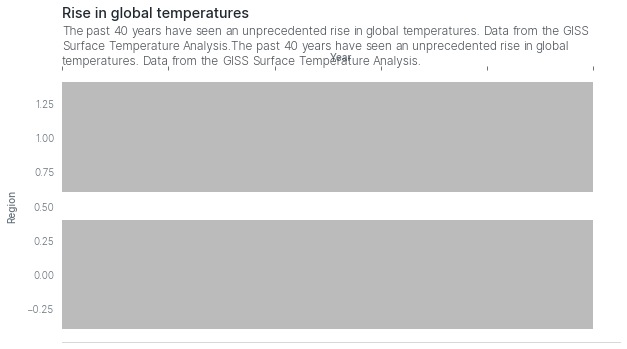

In [58]:
# import the Drawable class and set the style
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# create a general style
style = { 'color': '#BBBBBB' }

# draw the visualization
figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
viz.draw_bar_100(df.loc['China'].tolist(), **style)
viz.draw_bar_100(df.loc['European Union'].tolist(), **style)

# customize the plot
viz.axis.xaxis.set_label_position('top')
viz.axis.xaxis.tick_top() # TODO: move
viz.grid(False) # TODO: move
viz.set_xlabel('Year')
viz.set_ylabel('Region')
viz.set_title('Rise in global temperatures', loc='left')
viz.set_caption("""The past 40 years have seen an unprecedented rise in global temperatures.
                   Data from the GISS Surface Temperature Analysis.The past 40 years have seen an unprecedented rise in global temperatures.
                   Data from the GISS Surface Temperature Analysis.""")
viz.redraw()
plt.show()